In [1]:
#loading importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
print("Libraries imported.")

Libraries imported.


In [9]:
#reading/loading data
df= pd.read_csv(r"C:\Users\sheej.DESKTOP-SDF1007\OneDrive\Documents\data\netflix_titles.csv\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
df.shape

(7787, 12)

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df.isnull().sum()/(len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
#director column having maximum of 30% null values
#director column has minimal use and having no logical way to replace values
#hence getting droped
df.drop(["director"],inplace= True,axis= 1)

In [14]:
#similarly cast column also getting droped 
df.drop(["cast"],inplace= True,axis= 1)

In [15]:
#temporarily filling null values of date_added with unknown later to be replaced with logical value
df.date_added.fillna("unknown",inplace= True)

In [25]:
df.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
year              0
dtype: int64

In [26]:
#creating new year column from date_added column
df["year"]= df.date_added.apply(lambda x: str(x).split(",")[-1])

In [27]:
#most occuring date:2019
df.year.value_counts()

 2019      2153
 2020      2009
 2018      1685
 2017      1225
 2016       443
 2021       117
 2015        88
 2014        25
 2011        13
 2013        11
unknown      10
 2012         3
 2009         2
 2008         2
 2010         1
Name: year, dtype: int64

In [28]:
#replacing unknown values with 2019(most occuring date year)
df["year"]= df.year.apply(lambda x: str(x).replace("unknown","2021"))

In [29]:
#removing extra space in the year column values
df["year"]= df.year.apply(lambda x: str(x).replace(" ",""))

In [30]:
df.year.value_counts()

2019    2153
2020    2009
2018    1685
2017    1225
2016     443
2021     127
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: year, dtype: int64

In [31]:
#most occuring country
df.country.value_counts()

United States                          2555
India                                   923
United Kingdom                          397
Japan                                   226
South Korea                             183
                                       ... 
Pakistan, United Arab Emirates            1
Netherlands, Germany, Italy, Canada       1
United States, Sweden, Norway             1
United Kingdom, Russia                    1
Spain, Mexico, France                     1
Name: country, Length: 681, dtype: int64

In [32]:
#filling null values of country with most occuring country
df.country.fillna("United_states",inplace= True)

In [33]:
#most occuring rating
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [34]:
#filling null values of rating with most occuring rating
df.rating.fillna("TV-MA",inplace= True)

In [50]:
clean_df_nd = df
clean_df_nd

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7784,s7785,Movie,Zulu Man in Japan,United_states,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020


In [54]:
clean_df_nd.to_csv("C:\\Users\sheej.DESKTOP-SDF1007\OneDrive\Documents\data\Cleaned_Netflix_Titles.csv")

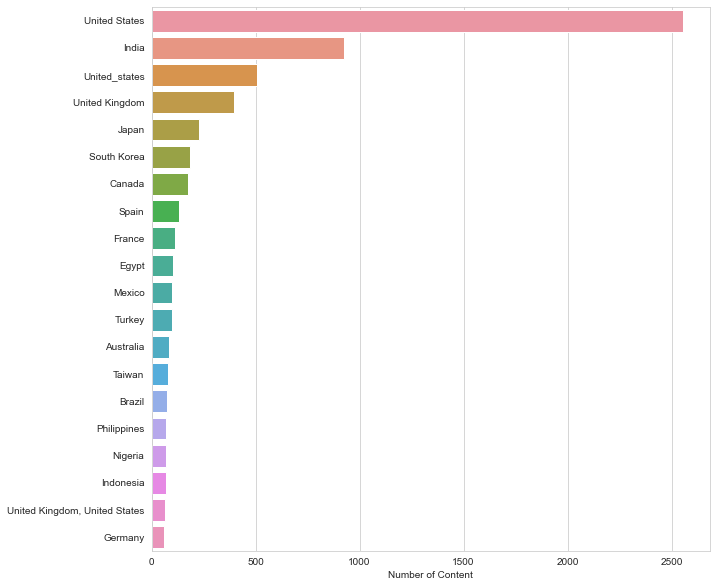

In [61]:
#countries with most contribution to netflix content
x= df.country.value_counts().head(20)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Number of Content")
plt.savefig('Number_of_Content_by_Country.png', dpi=250)

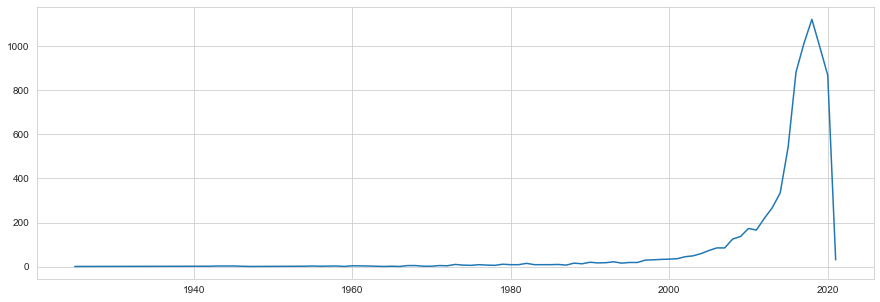

In [71]:
#Netflix content releases over the years
x= df.release_year.value_counts()
plt.figure(figsize=(15,5))

sns.lineplot(x=x.index ,y= x.values)
plt.savefig('Netflix_Content_Release_by_Year.png', dpi=250)

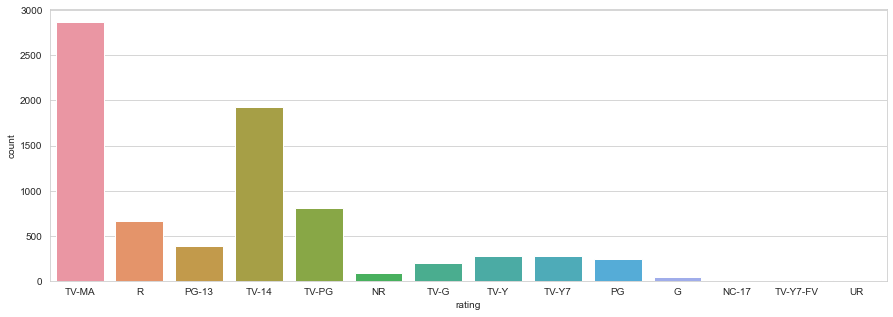

In [66]:
#content distribution based on rating
#most of the content of netflix is either rated TV-MA or TV-14
plt.figure(figsize=(15,5))
sns.countplot(x= "rating",data= df)
plt.savefig('Netflix_Content_Rating.png', dpi=250)